In [1]:
## Wendy Hendiana Putra
## 221351154
## Pagi C

In [2]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('Pinjaman.csv')

In [4]:
df.head()

,Usia,Pendapatan,Status_Perkawinan,Jumlah_Pinjaman,Durasi_Pinjaman,Status_Pekerjaan,Lulus_Kredit
0,25,40,0,50,5,1,1
1,45,100,1,80,10,3,0
2,35,60,1,100,15,0,1
3,28,75,0,60,7,1,0
4,50,120,1,150,20,3,0


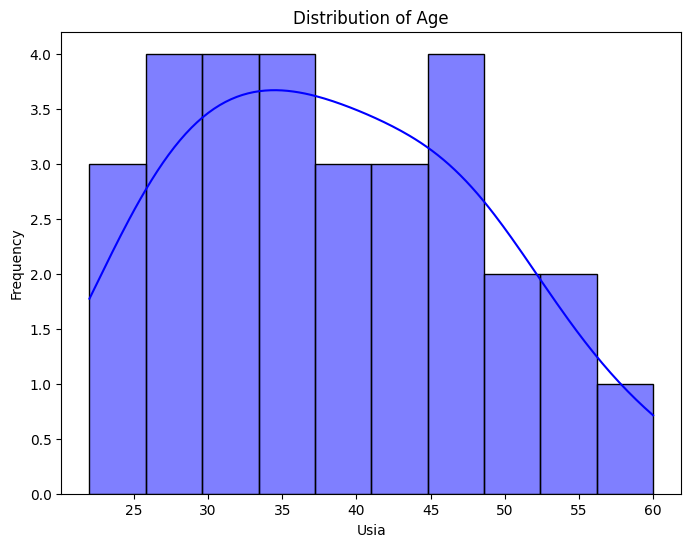

In [29]:
# Distribution of Age

plt.figure(figsize=(8,6))
sns.histplot(df['Usia'], bins=10, kde=True, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Usia')
plt.ylabel('Frequency')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9272\4025662214.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Lulus_Kredit', y='Pendapatan', data=df, palette='Set1')


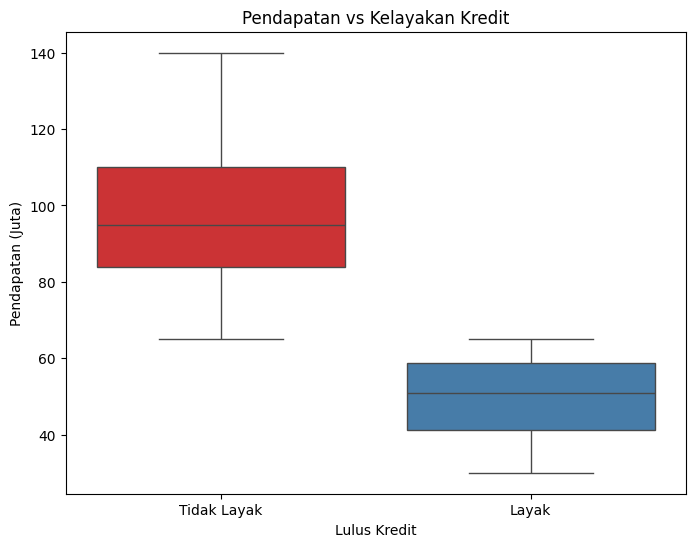

In [6]:
#Boxplot of Income (Pendapatan) vs Lulus Kredit

plt.figure(figsize=(8,6))
sns.boxplot(x='Lulus_Kredit', y='Pendapatan', data=df, palette='Set1')
plt.title('Pendapatan vs Kelayakan Kredit')
plt.xlabel('Lulus Kredit')
plt.ylabel('Pendapatan (Juta)')
plt.xticks(ticks=[0,1], labels=['Tidak Layak', 'Layak'])
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9272\3195090480.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Status_Perkawinan', data=df, palette='Set2')


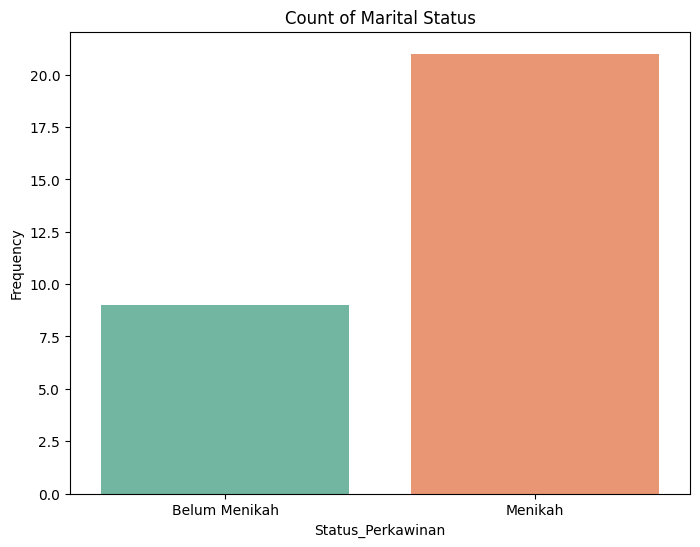

In [7]:
# Countplot of Marital Status

plt.figure(figsize=(8,6))
sns.countplot(x='Status_Perkawinan', data=df, palette='Set2')
plt.title('Count of Marital Status')
plt.xticks(ticks=[0,1], labels=['Belum Menikah', 'Menikah'])
plt.ylabel('Frequency')
plt.show()

<Figure size 800x600 with 0 Axes>

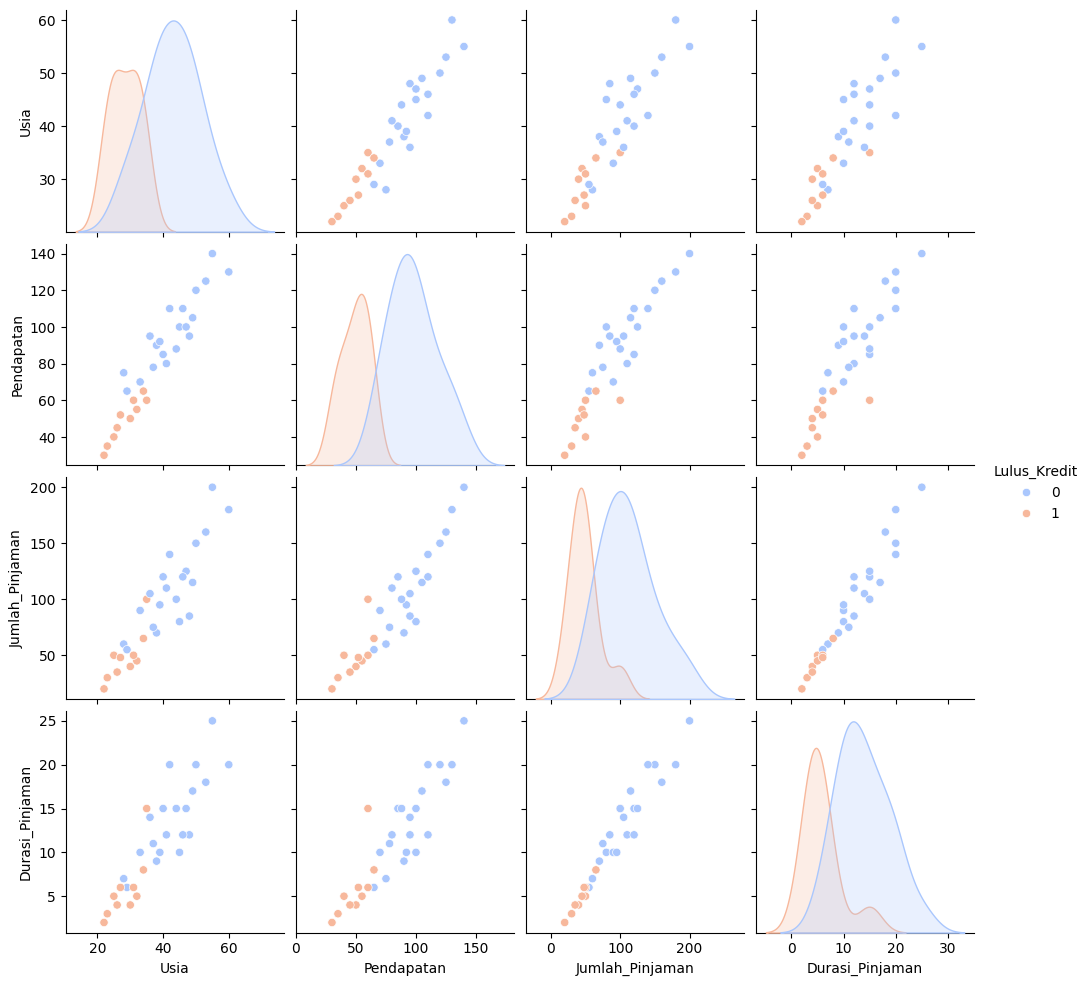

In [8]:
# Pairplot for the numerical features

plt.figure(figsize=(8, 6))
sns.pairplot(df[['Usia','Pendapatan',
                 'Jumlah_Pinjaman',
                 'Durasi_Pinjaman',
                 'Lulus_Kredit']],
                 hue='Lulus_Kredit', palette='coolwarm')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9272\4075709058.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Lulus_Kredit', y='Jumlah_Pinjaman', data=df, palette='Set2')


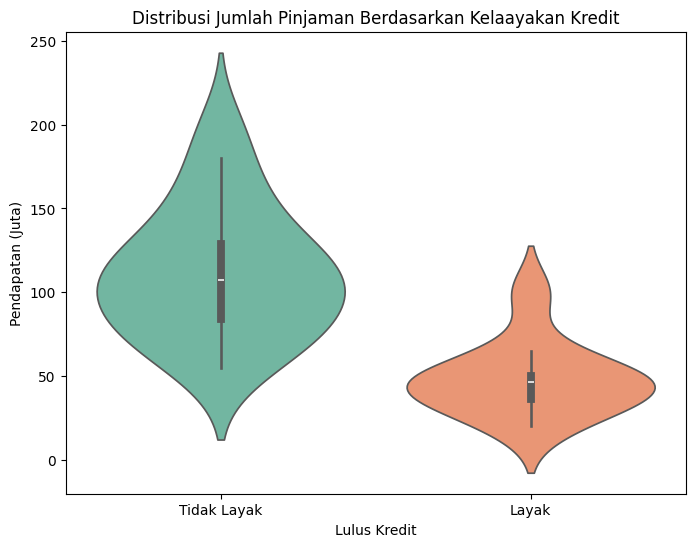

In [9]:
# Violin plot of Loan Amont vs Credit Eligibility

plt.figure(figsize=(8, 6))
sns.violinplot(x='Lulus_Kredit', y='Jumlah_Pinjaman', data=df, palette='Set2')
plt.title('Distribusi Jumlah Pinjaman Berdasarkan Kelaayakan Kredit')
plt.xlabel('Lulus Kredit')
plt.ylabel('Pendapatan (Juta)')
plt.xticks(ticks=[0,1], labels=['Tidak Layak','Layak'])
plt.show()

In [10]:
label_encoder_status_perkawinan = LabelEncoder()
label_encoder_status_pekerjaan = LabelEncoder()
label_encoder_lulus_kredit = LabelEncoder()

In [11]:
df['Status_Perkawinan'] = label_encoder_status_perkawinan.fit_transform(df['Status_Perkawinan'])
df['Status_Pekerjaan'] = label_encoder_status_pekerjaan.fit_transform(df['Status_Pekerjaan'])
df['Lulus_Kredit'] = label_encoder_lulus_kredit.fit_transform(df['Lulus_Kredit'])

In [12]:
df.to_csv('Pinjaman.csv', index=False)

In [13]:
# Splitting the dataset into features and labels
X = df.drop(columns=['Lulus_Kredit'])
y = df['Lulus_Kredit']

In [14]:
# Splitting data into training and testing set (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [15]:
# Creating and training the KKN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
# Predicting the test data
y_pred = knn_model.predict(X_test)

In [17]:
# Contoh
# [Usia : 30, 
# Pendapatan : 30,
# Status Perkawinan : 0,
# Jumlah Pinjaman : 70,
# Durasi Pinjaman : 10,
# Status Pekerjaan : 1]
new_data = np.array([[30,80,0,70,10,1]])
new_pred = knn_model.predict(new_data)

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [18]:
print('Hasil Prediksi : ', new_pred)

Hasil Prediksi :  [0]


In [19]:
label_encoder_lulus_kredit.inverse_transform(new_pred)

array([0])

In [20]:
# Calculating the accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

In [21]:
# Menyimpan Model menggunakan Pickle
import pickle

filename = 'knn_pinjam_mod.pkl'
pickle.dump(knn_model, open(filename, 'wb'))